Question 1

In [6]:
import mylibrary.fpm as fpm #Importing fixed point method library file
import math

def g(x):
    return math.exp(-x)

x=1  # Starting x value 
print("Starting value of x =",x)
root=fpm.main(g,x)
print("The root of the given equation using Fixed point iteration is = ",round(root,4))
print()
x=10  # Starting x value 
print("Starting value of x =",x)
root=fpm.main(g,x)
print("The root of the given equation using Fixed point iteration is = ",round(root,4))

Starting value of x = 1
No. of iterations =  17
The root of the given equation using Fixed point iteration is =  0.5671

Starting value of x = 10
No. of iterations =  19
The root of the given equation using Fixed point iteration is =  0.5671


Question 2

In [3]:
import mylibrary.simp as simp #Importing Simpson Integration method library file
import mylibrary.gqd as gqd #Importing Guassian Quadrature Integration method library file
import numpy as np

def f(x):
    return np.sqrt(1 + x**4)

# Integration limits
a=0
b=1

print("\tSimpson Method","\t\t\t\t","Gaussian Quadrature")
print("-----------------------------------------------------------------------------")
print("\tN","\t","Integral","\t\t\t","N","\t","Integral")
print("-----------------------------------------------------------------------------")
# Ns =  no. of divisions between a and b
# Ng = order of legendre polynomial
Ns=10
Ng=3
print("       ",Ns,"\t",round(simp.main(f,a,b,Ns),6),"\t\t\t",Ng,"\t",round(gqd.main(f,a,b,Ng),6))
Ns=20
Ng=4
print("       ",Ns,"\t",round(simp.main(f,a,b,Ns),6),"\t\t\t",Ng,"\t",round(gqd.main(f,a,b,Ng),6))
Ns=50
Ng=5
print("       ",Ns,"\t",round(simp.main(f,a,b,Ns),6),"\t\t\t",Ng,"\t",round(gqd.main(f,a,b,Ng),6))
Ns=60
Ng=6
print("       ",Ns,"\t",round(simp.main(f,a,b,Ns),6),"\t\t\t",Ng,"\t",round(gqd.main(f,a,b,Ng),6))
Ns=100
Ng=7
print("       ",Ns,"\t",round(simp.main(f,a,b,Ns),6),"\t\t\t",Ng,"\t",round(gqd.main(f,a,b,Ng),6))
Ns=1000
Ng=8
print("       ",Ns,"\t",round(simp.main(f,a,b,Ns),6),"\t\t\t",Ng,"\t",round(gqd.main(f,a,b,Ng),6))

	Simpson Method 				 Gaussian Quadrature
-----------------------------------------------------------------------------
	N 	 Integral 			 N 	 Integral
-----------------------------------------------------------------------------
        10 	 1.18371 			 3 	 1.089459
        20 	 1.089429 			 4 	 1.089424
        50 	 1.089429 			 5 	 1.08943
        60 	 1.089429 			 6 	 1.089429
        100 	 1.089429 			 7 	 1.089429
        1000 	 1.089429 			 8 	 1.089429


Question 3

In [4]:
import math
import mylibrary.rk42v as rk4 #Importing RK4 differential equation solver library file

# Given Function
def f(x,y):
    return (5*(x**2)-y)/(math.exp(x+y))

# Initial values
x0=0 
y0=1
# Values of x at which we solve the differential equation
xn=0.5 
xn2=10
xn3=500
print("Interval size","\t",f"Result(y({xn:.1f}))","\t",f"Result(y({xn2:.1f}))","\t",f"Result(y({xn3:.1f}))")
print("-----------------------------------------------------------------------------------")
A=[0.5,0.2,0.05,0.01] # Different interval sizes
for i in A:
    h=i
    print("   ",h,"\t",rk4.main(f,x0,y0,xn,h),"\t",rk4.main(f,x0,y0,xn2,h),"\t",rk4.main(f,x0,y0,xn3,h))


Interval size 	 Result(y(0.5)) 	 Result(y(10.0)) 	 Result(y(500.0))
-----------------------------------------------------------------------------------
    0.5 	 0.9131933683646087 	 2.44455734472942 	 2.446947724546922
    0.2 	 0.9267111805650831 	 2.4448165298096605 	 2.4468449439350146
    0.05 	 0.9185350977621509 	 2.4444520517429957 	 2.4468426640051595
    0.01 	 0.9130596146455227 	 2.4444715666949355 	 2.446842655979669


Question 4

Alpha =  0.15625
Solution Table:
[[0.         0.099      0.1355     ... 0.18851324 0.18845461 0.18839601]
 [0.3168     0.3148     0.3443625  ... 0.37683887 0.37672169 0.37660456]
 [0.6272     0.6252     0.6232     ... 0.56478953 0.56461396 0.56443846]
 ...
 [0.6272     0.6252     0.6232     ... 0.56478953 0.56461396 0.56443846]
 [0.3168     0.3148     0.3443625  ... 0.37683887 0.37672169 0.37660456]
 [0.         0.099      0.1355     ... 0.18851324 0.18845461 0.18839601]]


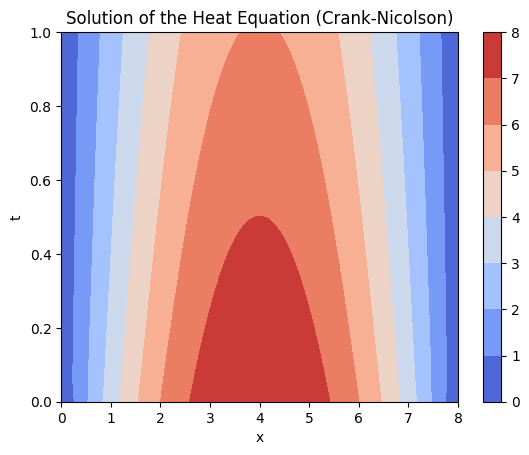

In [2]:
import mylibrary.cnk as cnk #Importing Crank-Nicolson differential equation solver library file
import mylibrary.gji as gji #Importing Gauss Jordan matrix inverter library file
import mylibrary.mm as mm #Importing Matrix multiplication library file
import numpy as np

def g(x):
    return 4*x - (x**2)/2

L = 8  # Length of the rod
T = 1  # Total time
Nx = 100  # Number of spatial points
Nt = 1000  # Number of time steps
alpha = (T/Nt)/((L/Nx)**2)
print("Alpha = ", alpha)

A=[]
B=[]
for i in range(Nx + 1):
    row=[]
    for j in range(Nx + 1):
        row.append(0.0)
    A.append(row)

for i in range(Nx + 1):
    row=[]
    for j in range(Nx + 1):
        row.append(0.0)
    B.append(row)

A=np.matrix(A)
B=np.matrix(A)
# Crank-Nicolson time-stepping module
# The values of matrix A and B are calculated manually
for i in range (Nx+1):
    for j in range (Nx+1):
        if i==j:
            A[i,j]=1+(4*alpha)
            B[i,j]=1-(4*alpha)
        elif abs(i-j)==1:
            A[i,j]=(-2*alpha)
            B[i,j]=(2*alpha)
        else:
            A[i,j]=0
            B[i,j]=0
AI=gji.main(A)
C=mm.main(AI,B)
cnk.main(L,T,Nx,Nt,g,C)

# The Crank-Nicolson parameter(alpha) is selected for which the contour plot is most stable.
# As the A matrix is sparse we have used Gauss Jordan inverter to invert the matrix.


Question 5

Solution Table:
[[0.         0.         0.         0.         0.         0.        ]
 [0.4        0.48799449 0.5958319  0.727864   0.88947608 1.08731273]
 [0.8        0.97608734 1.19182544 1.45589688 1.77906296 2.17462546]
 [1.2        1.46441197 1.78819829 2.18433287 2.66892413 3.26193819]
 [1.6        1.95318606 2.38529182 2.91355884 3.55936858 4.34925093]
 [2.         2.44280552 2.9836494  3.6442376  4.45108186 5.43656366]]


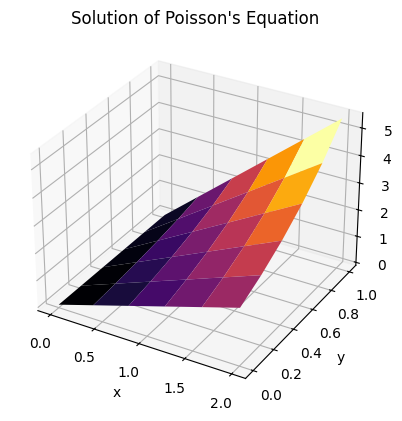

In [1]:
import numpy as np
import mylibrary.poe as poe #Importing Poisson's equation solver library file

# Grid parameters
Lx=2
Ly=1
nx = 6
ny = 6
dx = Lx / (nx - 1)
dy = Ly / (nx - 1)

# Initialize grid
x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

# Initialization of solution matrix
u = np.zeros((nx, ny))

# Boundary conditions
u[:, 0] = x
u[:, -1] = x * np.exp(1)
u[0, :] = 0
u[-1, :] = 2 * np.exp(y)

poe.main(Lx,Ly,nx,ny,u)
